In [1]:
import numpy as np
import scipy.linalg as spla
import scipy.fftpack as fp
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

In [2]:
np.random.seed(0)

In [3]:
## Parameters

n_agents = 4 # number of agents
k = 0.2 * (n_agents+1) # K
#w_disp = 1. * 1e-3 # w dispersion
w_disp = 1.
#delta = np.pi/2 - 0.01
delta = 0

dt = 0.01 # time step (sample spacing)
sim_time = 60. # sumulation time (in seconds)
n_it = int(sim_time / dt)
print(n_it)

6000


In [4]:
## Init vals

# natural frequency
#w_nat = np.random.standard_cauchy(n_agents) * w_disp
#w_nat = np.random.rand(n_agents) * w_disp
#w_nat = np.arange(1, n_agents + 1) * w_disp
#w_nat = w_disp
#w_nat = np.arange(1, n_agents + 1) * w_disp
w_nat = np.array([1., 1.1, 4., 4.1]) * w_disp

# theta 0
#theta_0 = 2 * np.pi * np.random.rand(n_agents)    # theta
theta_0 = np.array([1.24, 2.32, 5.16, 0.61])
#theta_0 = np.linspace(0, 2 * np.pi - 0.1, n_agents)

# mu
#mu = np.array([1, 5, 1, 5]) * 0.1
mu = np.array([10, 50, 10, 50]) * 0.1

# f0
f0 = np.array([0.2, 0.2, 0.4, 0.4])

# linear coefficients
a_lin = np.array([2, 2, ])

print(w_nat)
print(theta_0)

[1.  1.1 4.  4.1]
[1.24 2.32 5.16 0.61]


In [5]:
## Progress recording

thetas = np.zeros((n_agents, n_it))
thetas_dot = np.zeros_like(thetas)
time_vals = np.linspace(0., sim_time, n_it)

In [6]:
## Start loop

theta = theta_0
for ittt in range(n_it):
    # sum of sins
    theta_mat = np.repeat(theta.reshape(n_agents, 1), n_agents, axis=1)
    diffs = theta_mat.T - theta_mat
    sins = np.sin(diffs - delta)
    sums_sins = np.sum(sins, axis=1)
    sums_diffs = np.sum(diffs, axis=1)
    
    if ittt > n_it//3:
        theta_new = theta + dt * (w_nat + 1 * (k / n_agents) * sums_sins + 
                                  0 * np.multiply(mu, np.sin(2 * f0 * np.pi * ittt * dt)))
                                  #1 * mu * np.exp(ittt * dt / 10))
    else:
        theta_new = theta + dt * (w_nat + 1 * (k / n_agents) * sums_sins + 
                                  0 * np.multiply(mu, np.sin(2 * f0 * np.pi * ittt * dt)))
    thetas[:, ittt] = theta 
    thetas_dot[:, ittt] = np.divide(theta_new - theta, dt)
    theta = theta_new

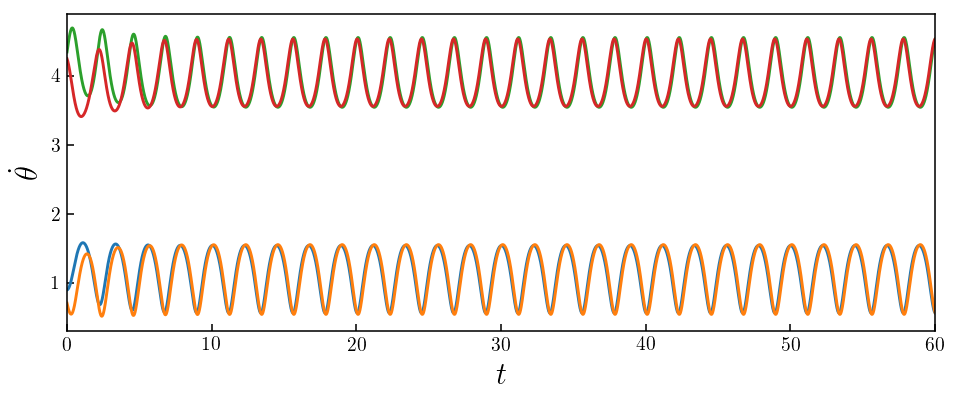

In [7]:
## Plot theta dot

plt.figure(figsize=(8, 3), dpi=140)
for i in range(n_agents):
    plt.plot(time_vals, thetas_dot[i], '-')
plt.xlabel(r'$t$', fontsize=16)
plt.ylabel(r'$\dot{\theta}$', fontsize=16)
plt.xlim(0, n_it * dt)
plt.show()

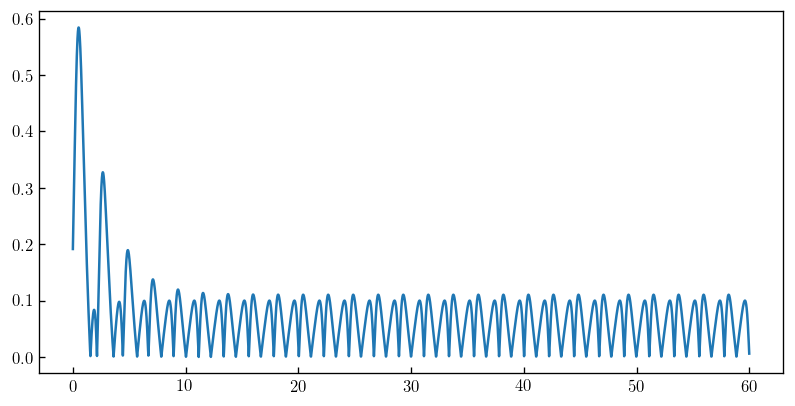

In [8]:
## Plot theta dot differences

td_diff = np.abs(thetas_dot[0] - thetas_dot[1])
plt.figure(figsize=(8, 4), dpi=120)
plt.plot(time_vals, td_diff)
plt.show()

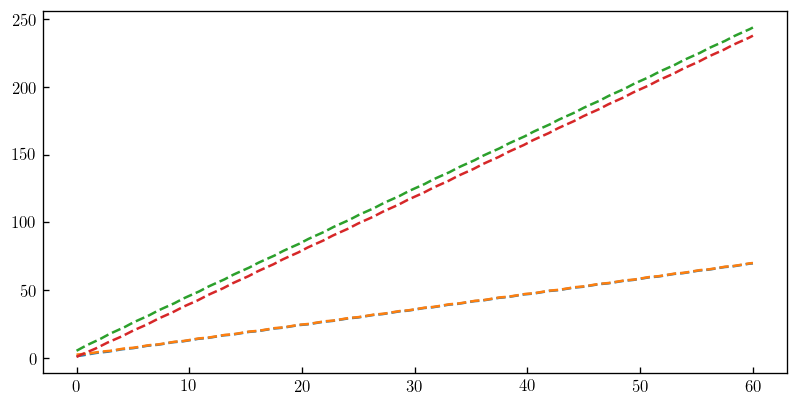

In [9]:
## Plot theta

plt.figure(figsize=(8, 4), dpi=120)
for i in range(n_agents):
    plt.plot(time_vals, thetas[i], '--')
plt.show()

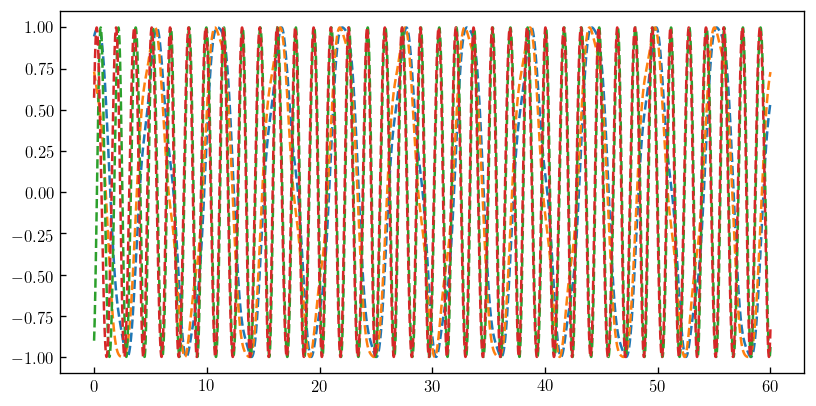

In [10]:
## Plot sin theta

thetas_sin = np.sin(thetas)

plt.figure(figsize=(8, 4), dpi=120)
for i in range(n_agents):
    plt.plot(time_vals, thetas_sin[i], '--')
plt.show()

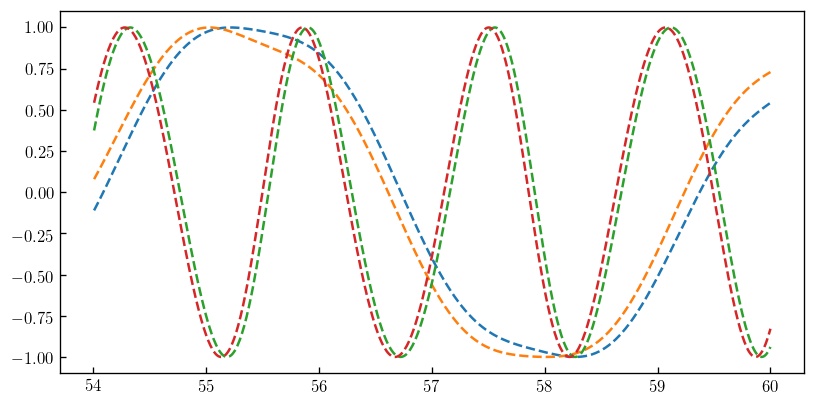

In [11]:
## Partial plot

max_perc = 0.9
max_val = int(max_perc * n_it)

plt.figure(figsize=(8, 4), dpi=120)
for i in range(n_agents):
    plt.plot(time_vals[max_val:], thetas_sin[i][max_val:], '--')
plt.show()

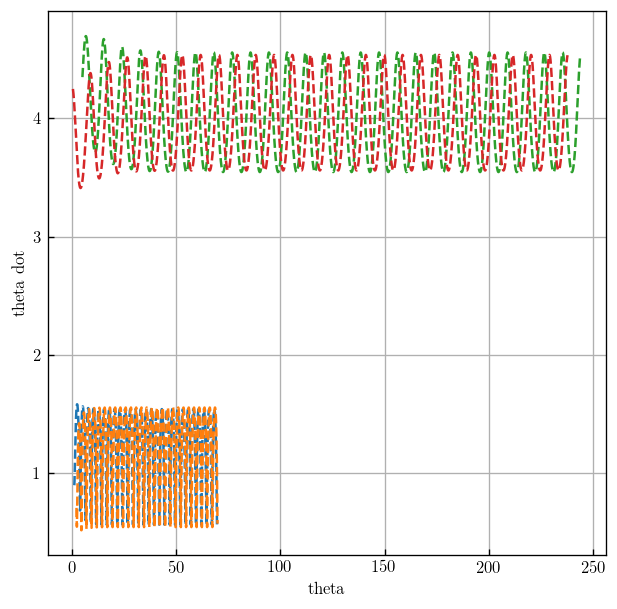

In [12]:
## theta dot against theta (phase portrait)

plt.figure(figsize=(6, 6), dpi=120)
for i in range(n_agents):
    plt.plot(thetas[i], thetas_dot[i], '--')
plt.xlabel('theta')
plt.ylabel('theta dot')
plt.grid(which='major')
plt.grid(which='minor')
plt.show()

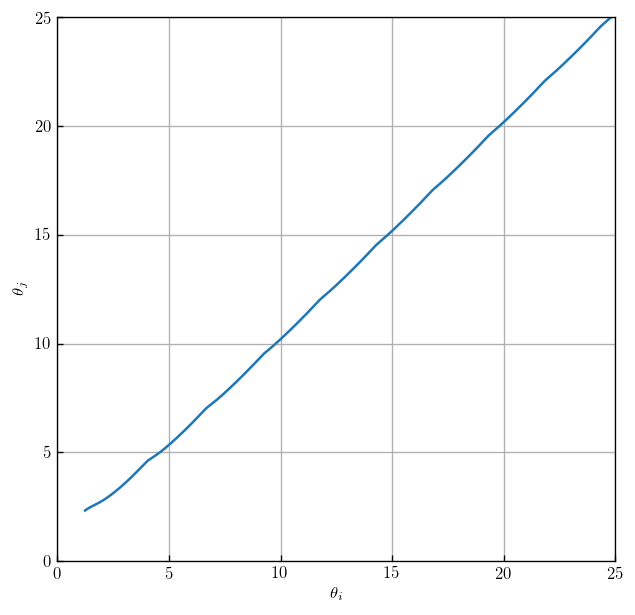

In [13]:
## theta_i against theta_j

i = 0
j = 1
plt.figure(figsize=(6, 6), dpi=120)
plt.plot(thetas[i], thetas[j])
plt.xlabel(r'$\theta_i$')
plt.ylabel(r'$\theta_j$')
plt.grid(which='major')
plt.grid(which='minor')
plt.xlim((0, 25))
plt.ylim((0, 25))
plt.show()